In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Single neuron

![experiment schematic](single_cell_recording.png "Single cell recording")
![simplified system](singe_cell_sim.svg)

This simplified model of a neuron is mathematically expressed with a first-order ordinary differential equation:

$$
\tau \frac{d r(t)}{dt} = -r(t) + I(t)
$$

which we can discretize in time (in steps $dt$) in order to simulate numerically using the Euler method:

$\tau \frac{r(t+dt) - r(t)}{dt} = -r(t) + I(t) \; \; \; $ so that:  $\; \; \; r(t+dt) = r(t) + \frac{dt}{\tau} \left[ -r(t) + I(t) \right]$

Here is a piece of code that simulates how a neuron with membrane time constant $\tau$ integrates a time varying input and generates a rate output $r(t)$

In [2]:
dt = 0.001 # time step, in s
time = np.arange(0, 5, dt) # step times of the whole simulation, in s
Nt = len(time) # total number of steps in simulation

T = 0.5 # period of input current, in s
input = 10*np.ones((Nt,)) # 1 + np.sin(2*np.pi*time/T) # input current

rate = np.ones((Nt,)) # initialize firing rate at 1

tau = 0.02 # membrane time constant, in s

# simulation loop, through all time steps
for i in range(Nt-1):
    rate[i+1] = rate[i] + dt/tau*(-rate[i] + input[i])

Text(0, 0.5, 'rate')

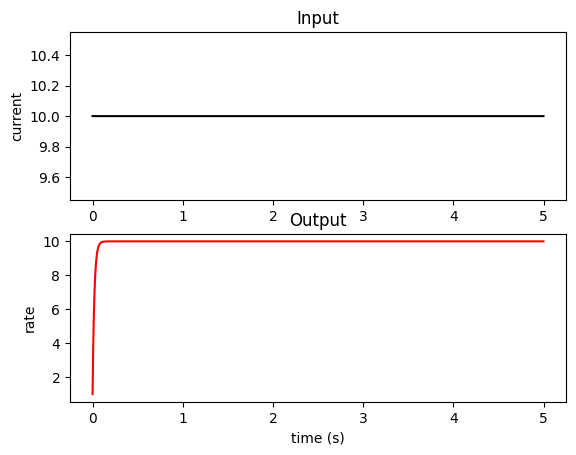

In [3]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, input, 'k')
ax[0].set_title('Input')
ax[0].set_ylabel('current')
ax[1].plot(time, rate, 'r')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')


Now copy the code above to see how a neuron with a much longer time constant (e.g. $\tau = 1 s$) would integrate this same input:

Now compare again the two neurons, one with short time constant ($\tau = 0.02 s$) and one with very long time constant ($\tau = 10 s$), but now have them respond to an input representing a current pulse, as per the code below:

In [4]:
input = np.ones((Nt,))
pulsesat = int(Nt/6)
input[pulsesat] = 3


Text(0, 0.5, 'rate')

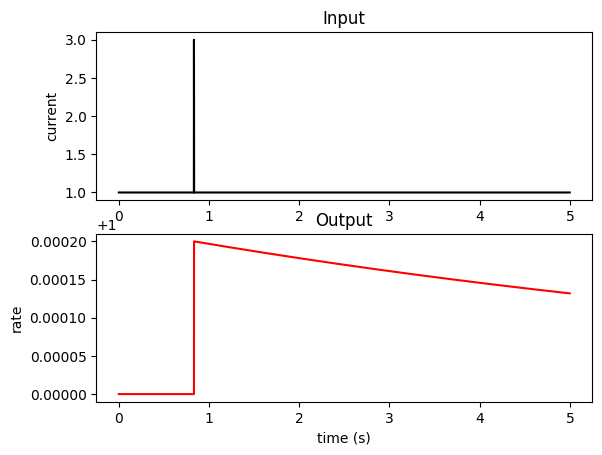

In [5]:
rate = np.ones((Nt,))

tau = 10
for i in range(Nt-1):
    rate[i+1] = rate[i] + dt/tau*(-rate[i] + input[i])

fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, input, 'k')
ax[0].set_title('Input')
ax[0].set_ylabel('current')
ax[1].plot(time, rate, 'r')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')

What do you see?

Now do the same thing but for an input consisting in a train of successive current pulses:

In [6]:
input = np.ones((Nt,))
pulsesat = int(Nt/6)*np.array([1,2,3,4,5])
input[pulsesat] = 3

Text(0, 0.5, 'rate')

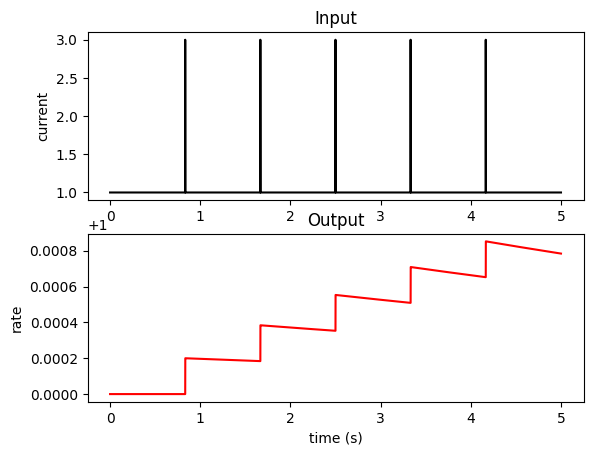

In [7]:
rate = np.ones((Nt,))

tau = 10
for i in range(Nt-1):
    rate[i+1] = rate[i] + dt/tau*(-rate[i] + input[i])

fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, input, 'k')
ax[0].set_title('Input')
ax[0].set_ylabel('current')
ax[1].plot(time, rate, 'r')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')

This is quite exciting: a single neuron can do things such as memory, or stimulus counting (integration)... but, what is a realistic membrane time constant in the brain? 20ms!

How could the brain do memory or stimulus integration if neurons have such slow time constant? Networks! Here is the simplest possible network:

# Neuron with autapse

![Autapse](autapse.svg "Autapse")

Now this simplified network model of a neuron is mathematically expressed with this first-order ordinary differential equation:

$$
\tau \frac{d r(t)}{dt} = -r(t) + \alpha r(t) + I(t)
$$

where $\alpha$ is the strength of the self-coupling of the neuron with itself (autapse). We again discretize this equation in time (in steps $dt$) using the Euler method to get:

$r(t+dt) = r(t) + \frac{dt}{\tau} \left[ (\alpha - 1) r(t) + I(t) \right]$

Now try simulating this equation for various values of $\alpha$ (restricted to be non-negative, $\alpha \ge 0$) when the neuron has a short membrane time constant (keep fixed $\tau = 0.02s$):

Text(0, 0.5, 'rate')

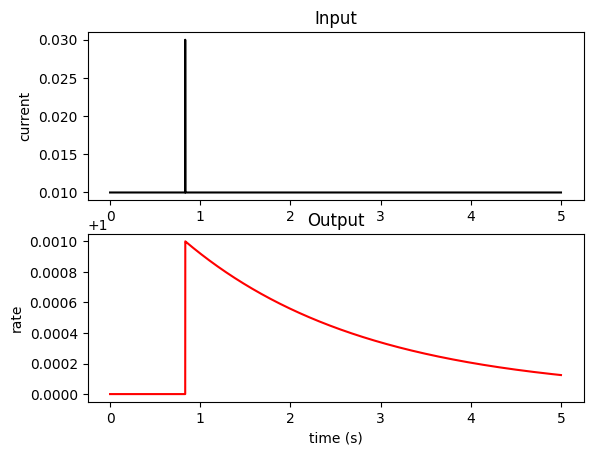

In [8]:
input = np.ones((Nt,))
pulsesat = int(Nt/6)
input[pulsesat] = 3

rate = np.ones((Nt,))

tau = 0.02
alpha = 0.99

input = input*np.abs(1-alpha)
for i in range(Nt-1):
    rate[i+1] = rate[i] + dt/tau*((alpha - 1)*rate[i] + input[i])

fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, input, 'k')
ax[0].set_title('Input')
ax[0].set_ylabel('current')
ax[1].plot(time, rate, 'r')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')

In what conditions does this network show perfect memory (i.e. it has a different rate depending on whether a stimulus was presented in the past or not)?

What happens if you set $\alpha>1$?

So, through recurrent connections, neurons with short membrane time constants can achieve memory and integration capabilities as if they had long time constants. This is one of the fundamental principles of network function in attractor networks.

Now let's address the issues with this simple network function: fine-tuning of memory ($\alpha=1$) and instabilities when $\alpha > 1$. Let us consider a fundamental architectural motif in neural circuits in the cerebral cortex: neurons are either excitatory or inhibitory, and are strongly coupled with one another. 

# The E-I circuit

![](EInetwork.svg)

We thus consider two neurons, one excitatory, one inhibitory, mutually connected. The network model is now mathematically expressed with this system of coupled first-order ordinary differential equations:

$$
\tau \frac{d r_E(t)}{dt} = -r_E(t) + \left[ W_{EE} r_E(t) - W_{EI} r_I(t) + I_E(t) - \theta_E \right]_{+} \\
\tau \frac{d r_I(t)}{dt} = -r_I(t) + \left[ W_{IE} r_E(t) - W_{II} r_I(t) + I_I(t) - \theta_I \right]_{+} 
$$

where $W_{XY}$ are all non-negative and denote the strengths of the couplings between neuron $X$ and neuron $Y$. To ensure that firing rates are positive, we apply a linear-threshold transformation $[\;I - \theta ]_{+}$ to the inputs, with thresholds $\theta_E$ and $\theta_I$. We again discretize this equation in time (in steps $dt$) using the Euler method to get:

$$
r_E(t+dt) = r_E(t) + \frac{dt}{\tau} \left( -r_E(t) + \left[ W_{EE} r_E(t) - W_{EI} r_I(t) + I_E(t) - \theta_E \right]_+ \right)\\
r_I(t+dt) = r_I(t) + \frac{dt}{\tau} \left( -r_I(t) + \left[ W_{IE} r_E(t) -W_{II} r_I(t) + I_I(t) - \theta_I \right]_+ \right)
$$

This system now is quite rich and can display a number of interesting dynamics. For instance, it can show the memory function that we discussed, but in a much more robust system. You can play with connectivity strengths in this code and convince you that this perfect memory is not subject to strict fine-tuning, thanks to the interaction of excitation and inhibition. For a detailed analysis of this system dynamics, you can explore [this article ](https://doi.org/10.7554/eLife.22425).

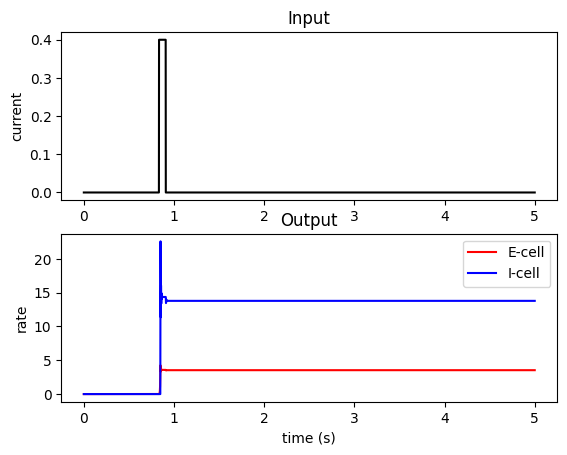

In [9]:
dt = 0.0005
time = np.arange(0, 5, dt)
Nt = len(time)

input = np.zeros((Nt,))
pulsesat = int(Nt/6)
input[pulsesat:pulsesat+150] = 0.4

tauE = 0.01
tauI = 0.002
WEE = 5
WEI = 1
WIE = 10
WII = 0.5
GE = 1
GI = 4

rateI = np.zeros((Nt,))
rateE = np.zeros((Nt,))

def rectify(x, threshold):
    return (x - threshold) * (x > threshold)

for i in range(Nt-1):
    rateE[i+1] = rateE[i] + dt/tauE*( -rateE[i] + GE * rectify(WEE*rateE[i] - WEI*rateI[i] + input[i], 0.35) )
    rateI[i+1] = rateI[i] + dt/tauI*( -rateI[i] + GI * rectify(WIE*rateE[i] - WII*rateI[i] , 25) )

fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, input, 'k')
ax[0].set_title('Input')
ax[0].set_ylabel('current')
ax[1].plot(time, rateE, 'r', label='E-cell')
ax[1].plot(time, rateI, 'b', label='I-cell')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')
ax[1].legend()

How does this network respond to an excitatory input pulse applied to the excitatory population? and to the inhibitory population? 

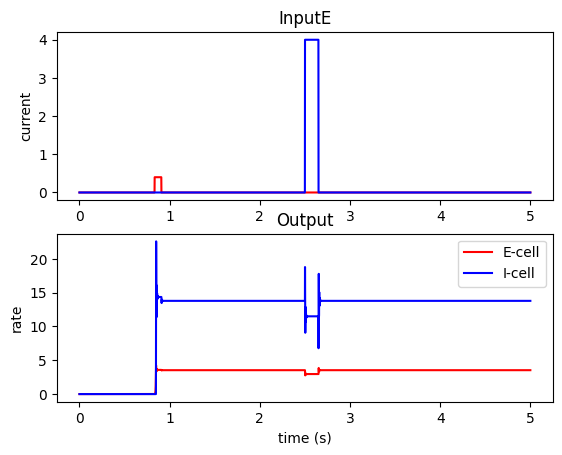

In [10]:
dt = 0.0005
time = np.arange(0, 5, dt)
Nt = len(time)

# initialize all inputs to zero
inputE = np.zeros((Nt,))
inputI = np.zeros((Nt,))

# first pulse to go into the non-zero solution
pulsesat = int(Nt/6)
inputE[pulsesat:pulsesat+150] = 0.4 

# now let's apply a pulse in the middle of the simulation to either the excitatory or the inhibitory neuron
pulsesat = int(3*Nt/6)
inputI[pulsesat:pulsesat+300] = 4
#inputE[pulsesat:pulsesat+300] = 4

tauE = 0.01
tauI = 0.002
WEE = 5
WEI = 1
WIE = 10
WII = 0.5
GE = 1
GI = 4

rateI = np.zeros((Nt,))
rateE = np.zeros((Nt,))

def rectify(x, threshold):
    return (x - threshold) * (x > threshold)

for i in range(Nt-1):
    rateE[i+1] = rateE[i] + dt/tauE*( -rateE[i] + GE * rectify(WEE*rateE[i] - WEI*rateI[i] + inputE[i], 0.35) )
    rateI[i+1] = rateI[i] + dt/tauI*( -rateI[i] + GI * rectify(WIE*rateE[i] - WII*rateI[i] + inputI[i], 25) )

fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, inputE, 'r')
ax[0].plot(time, inputI, 'b')
ax[0].set_title('InputE')
ax[0].set_ylabel('current')
ax[1].plot(time, rateE, 'r', label='E-cell')
ax[1].plot(time, rateI, 'b', label='I-cell')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')
ax[1].legend()

What do you see? Do you see a paradox? This network regime has been named "inhibition-stabilized network" or ISN. You can learn more about it in [this article](https://doi.org/10.1016/j.neuron.2009.03.028). This regime of operation is now considered to apply quite generally to neural circuits in the cerebral cortex (see [this article](https://doi.org/10.7554/eLife.54875)).

# Double-well attractor

![](doublewell.svg)

Now this starts getting complicated. Following the previous schematic for the EI network above, enter below the simulation for this 3-neuron network (in practice, we think of each unit in the network as a population of neurons, so we talk of a 3-population network):

However, we usually simplify things to deal with only two dynamical variables. Here, we can take advantage of the fact that inhibitory neurons have a faster time constant to assume that their equation relaxes more quickly to the steady state, so we freeze the firing rate of the inhibitory population to the steady state of its dynamics given the momentary rates of the two excitatory populations. If you are interested in these derivations, you can check them in [this book chapter](https://neuronaldynamics.epfl.ch/online/Ch16.S3.html). The resulting equations are:

$$
\tau_E \frac{d I_{E,1}}{dt} = - I_{E1} + (W_{EE} - \alpha) g_E(I_{E1}) - \alpha g_E(I_{E2}) + S_{1} \\
\tau_E \frac{d I_{E,2}}{dt} = - I_{E2} + (W_{EE} - \alpha) g_E(I_{E2}) - \alpha g_E(I_{E1}) + S_{2} 
$$

where $\alpha = -\gamma W_{EI}W_{IE}$ represents the effective inhibitory coupling between excitatory populations (via the inhibitory population), and $S_1$/$S_2$ are the inputs arriving to each excitatory population. Note that this model formulation is slightly different to what we have been doing so far in this workshop: now our dynamical variables are the inputs and not the rates of the populations. To plot the rates, we have to use $r_{E} = g_E(I_E)$.

These equations can be discretized to obtain this simulation code:

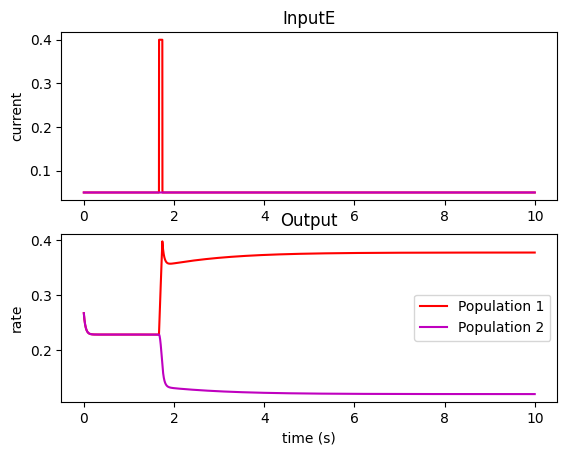

In [11]:
dt = 0.0005
time = np.arange(0, 10, dt)
Nt = len(time)

# initialize inputs 
drive0 = 0.05
inputE1 = drive0*np.ones((Nt,))
inputE2 = drive0*np.ones((Nt,))


# current pulse into one of the two populations
pulsesat = int(Nt/6)
inputE1[pulsesat:pulsesat+150] = 0.4 


tauE = 0.05
WEE = 2.9
WEI = -1
WIE = 1
gamma = 1.8

alpha = -gamma * WEI * WIE

inpE1 = -0.005*np.ones((Nt,))
inpE2 = -0.005*np.ones((Nt,))

def curr_to_rate(x):
    return (1+np.tanh(x-0.5))/2

for i in range(Nt-1):
    inpE1[i+1] = inpE1[i] + dt/tauE*(-inpE1[i] + (WEE - alpha)*curr_to_rate(inpE1[i]) - alpha*curr_to_rate(inpE2[i]) + inputE1[i] )
    inpE2[i+1] = inpE2[i] + dt/tauE*(-inpE2[i] + (WEE - alpha)*curr_to_rate(inpE2[i]) - alpha*curr_to_rate(inpE1[i]) + inputE2[i] )

rateE1 = curr_to_rate(inpE1)
rateE2 = curr_to_rate(inpE2)

fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, inputE1, 'r')
ax[0].plot(time, inputE2, 'm')
ax[0].set_title('InputE')
ax[0].set_ylabel('current')
ax[1].plot(time, rateE1, 'r', label='Population 1')
ax[1].plot(time, rateE2, 'm', label='Population 2')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')
ax[1].legend()

What happens if you send the input current pulse to population 2 instead of population 1? Argue about how this model can be used to remember specific events that happened in the recent past. 

These discrete attractor models have been applied to model working memory for objects. In this case there are just two possible memories, because there are two populations, but this can be generalized to an arbitrary number of discrete memories. If you want to learn more about these models, you can check [this paper](https://www.nature.com/articles/s41586-019-0919-7) on experimental evidence supporting it.

Also, notice how this network now responds to input by establishing a competition between the two populations: if one wins, the other one loses. This is what we call "winner-take-all" dynamics and it is thought also to be a mechanism underlying multiple brain computations from sensory perception to decision making.

### The double-well model in decision making

Now let's explore this network in a different situation: we do not establish a difference between the external inputs to the two populations but we add random independent noise to the currents of the two populations at each time step in the simulated dynamics. This represents internal noise of the brain. Explore what happens in this simulation by running it repeatedly over several "trials". Notice also that we change the overall drive to the network during the simulation, but keeping it equal for the two populations. What does this change in external drive achieve?

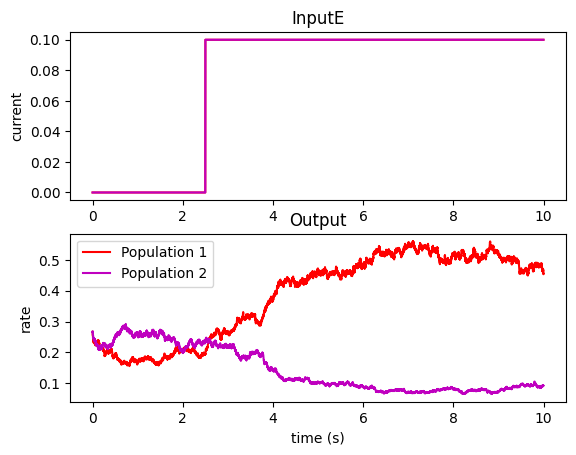

In [12]:
dt = 0.0005
time = np.arange(0, 10, dt)
Nt = len(time)

# initialize inputs 
drive0 = 0.
inputE1 = drive0*np.ones((Nt,))
inputE2 = drive0*np.ones((Nt,))

drive = 0.1
inputE1[Nt//4:] = drive
inputE2[Nt//4:] = drive

# first pulse to go into the non-zero solution
pulsesat = int(Nt/6)
#inputE1[pulsesat:pulsesat+150] = 0.4 


tauE = 0.05
WEE = 2.9
WEI = -1
WIE = 1
gamma = 1.8

alpha = -gamma * WEI * WIE

inpE1 = -0.005*np.ones((Nt,))
inpE2 = -0.005*np.ones((Nt,))

def curr_to_rate(x):
    return (1+np.tanh(x-0.5))/2

sigma = 0.3

for i in range(Nt-1):
    noise = sigma * np.random.randn()
    inpE1[i+1] = inpE1[i] + dt/tauE*(-inpE1[i] + (WEE - alpha)*curr_to_rate(inpE1[i]) - alpha*curr_to_rate(inpE2[i]) + inputE1[i] + noise)
    noise = sigma * np.random.randn()
    inpE2[i+1] = inpE2[i] + dt/tauE*(-inpE2[i] + (WEE - alpha)*curr_to_rate(inpE2[i]) - alpha*curr_to_rate(inpE1[i]) + inputE2[i] + noise)

rateE1 = curr_to_rate(inpE1)
rateE2 = curr_to_rate(inpE2)

fig, ax = plt.subplots(nrows=2)
ax[0].plot(time, inputE1, 'r')
ax[0].plot(time, inputE2, 'm')
ax[0].set_title('InputE')
ax[0].set_ylabel('current')
ax[1].plot(time, rateE1, 'r', label='Population 1')
ax[1].plot(time, rateE2, 'm', label='Population 2')
ax[1].set_title('Output')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('rate')
ax[1].legend()

Which of the two populations wins now the competition? How is that determined?

The advantage of having just two dynamical variables is that we can visualize the dynamics in what we call "phase space":

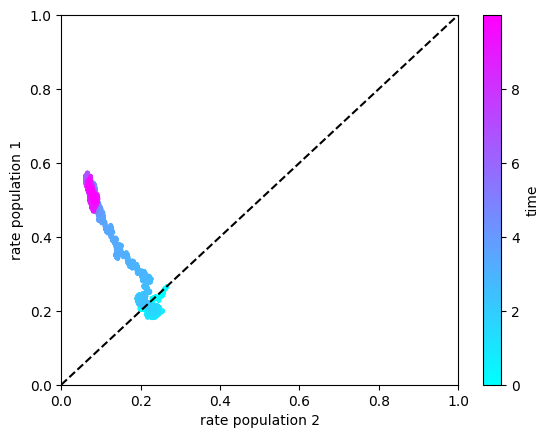

In [13]:
dt = 0.0005
time = np.arange(0, 10, dt)
Nt = len(time)

# initialize inputs 
drive0 = 0.
inputE1 = drive0*np.ones((Nt,))
inputE2 = drive0*np.ones((Nt,))

drive = 0.1
inputE1[Nt//4:] = drive
inputE2[Nt//4:] = drive

# first pulse to go into the non-zero solution
pulsesat = int(Nt/6)
#inputE1[pulsesat:pulsesat+150] = 0.4 


tauE = 0.05
WEE = 2.9
WEI = -1
WIE = 1
gamma = 1.8

alpha = -gamma * WEI * WIE

inpE1 = -0.005*np.ones((Nt,))
inpE2 = -0.005*np.ones((Nt,))

def curr_to_rate(x):
    return (1+np.tanh(x-0.5))/2

sigma = 0.3

for i in range(Nt-1):
    noise = sigma * np.random.randn()
    inpE1[i+1] = inpE1[i] + dt/tauE*(-inpE1[i] + (WEE - alpha)*curr_to_rate(inpE1[i]) - alpha*curr_to_rate(inpE2[i]) + inputE1[i] + noise)
    noise = sigma * np.random.randn()
    inpE2[i+1] = inpE2[i] + dt/tauE*(-inpE2[i] + (WEE - alpha)*curr_to_rate(inpE2[i]) - alpha*curr_to_rate(inpE1[i]) + inputE2[i] + noise)

rateE1 = curr_to_rate(inpE1)
rateE2 = curr_to_rate(inpE2)

plt.scatter(rateE1, rateE2, c=time, s=4, cmap='cool')
plt.colorbar(label='time')
plt.xlim([0,1])
plt.ylim([0,1])
plt.axline((1, 1), slope=1, color='k', ls='--')
plt.xlabel('rate population 2')
plt.ylabel('rate population 1');

try running several times the previous cell and see how the network dynamics changes from trial to trial. Can you make sense of this dynamics? Where does the network start and where does it evolve to towards the end of the trial?

One very useful way to think about this dynamics is to visualize it as the evolution of a ball that bounces down in a hilly landscape. This is more than just a visual analogy for networks that satisfy perfect symmetry (i.e. the connection from neuron X to neuron Y is equal to the connection from neuron Y to neuron X). For these kinds of networks this analogy is mathematically exact (see for example an explanation [here](https://neuronaldynamics.epfl.ch/online/Ch16.S4.html)) and this hilly landscape is what we call "energy". See here the energy calculated for the network above:

/tmp/ipykernel_3156581/462045236.py:7: RuntimeWarning: invalid value encountered in scalar add
  return 0.5*rate + 0.5* (lim*np.arctanh(lim) + 0.5*np.log(np.abs(1-lim*lim)) -0.7);


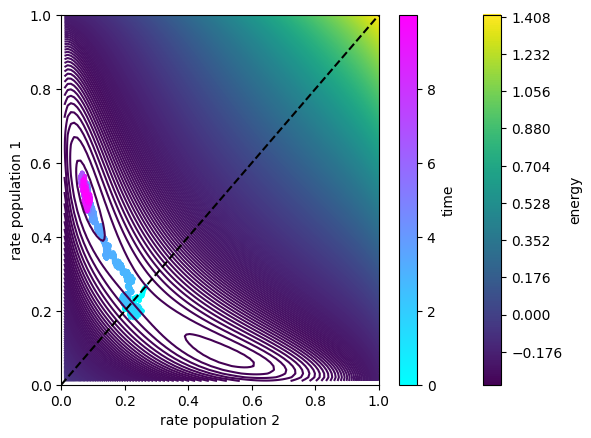

In [14]:
np.seterr(divide = 'ignore') 

energy = np.zeros((100,100))

def integral(rate):
    lim = 2*rate - 1
    return 0.5*rate + 0.5* (lim*np.arctanh(lim) + 0.5*np.log(np.abs(1-lim*lim)) -0.7);

for i in range(100):
    r1 = i/100
    for j in range(100):
        r2 = j/100
        energy[i,j] = -0.5*(WEE - alpha)*(r1**2 + r2**2) + alpha*r1*r2 - (drive*r1 + drive*r2) + integral(r1) + integral(r2)

plt.contour(energy, extent=[0, 1, 0, 1], levels=500)
plt.colorbar(label='energy')
plt.xlabel('rate population 2')
plt.ylabel('rate population 1')


plt.scatter(rateE1, rateE2, c=time, s=4, cmap="cool")
plt.colorbar(label='time')
plt.xlim([0,1])
plt.ylim([0,1])
plt.axline((1, 1), slope=1, color='k', ls='--')
plt.xlabel('rate population 2')
plt.ylabel('rate population 1');

As you can see, the trajectories in phase space that we saw before are falling down this landscape towards the two "wells" of minimal energy. Based on this energy picture, we often call this dynamics "double-well attractor", and it is a possible circuit mechanism both for working memory and decision making.

Here is a more graphic view of the double well, when taking a cut through the previous 2D energy landscape following the line $r_2 + r_1 = 0.6$:

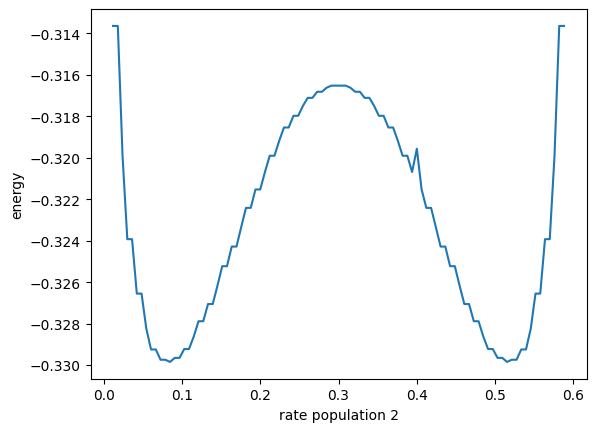

In [15]:
r1 = np.linspace(0,0.6,100)
r2 = -r1+0.6

i1 = r1*100
i1 = i1.astype(int)
i2 = r2*100
i2 = i2.astype(int)

plt.plot(r2, energy[i1, i2]);
plt.xlabel('rate population 2')
plt.ylabel('energy');

Now, remember that in our dynamical simulation we changed the external drive to the simulation and that started the decision process of the network. As an exercise, visualize the energy landscape for the external drive condition at the start of the simulation. Does it make sense to you? 

/tmp/ipykernel_3156581/1651296566.py:7: RuntimeWarning: invalid value encountered in scalar add
  return 0.5*rate + 0.5* (lim*np.arctanh(lim) + 0.5*np.log(np.abs(1-lim*lim)) -0.7)


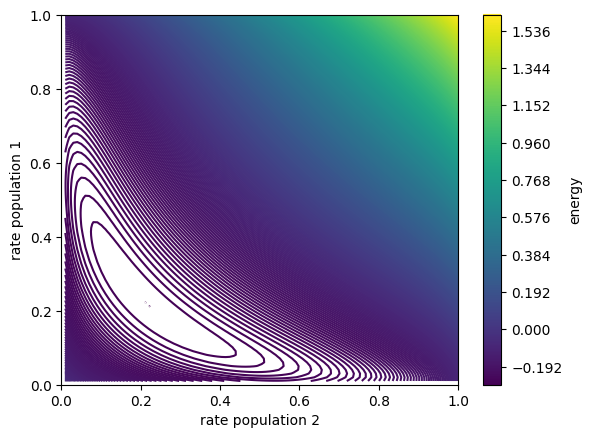

In [16]:
np.seterr(divide = 'ignore') 

energy = np.zeros((100,100))

def integral(rate):
    lim = 2*rate - 1
    return 0.5*rate + 0.5* (lim*np.arctanh(lim) + 0.5*np.log(np.abs(1-lim*lim)) -0.7)

for i in range(100):
    r1 = i/100
    for j in range(100):
        r2 = j/100
        energy[i,j] = -0.5*(WEE - alpha)*(r1**2 + r2**2) + alpha*r1*r2 - (drive0*r1 + drive0*r2) + integral(r1) + integral(r2)

plt.contour(energy, extent=[0, 1, 0, 1], levels=500)
plt.colorbar(label='energy')
plt.xlabel('rate population 2')
plt.ylabel('rate population 1');

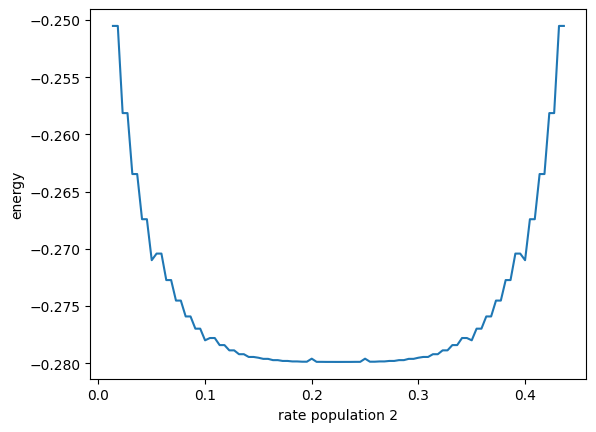

In [17]:
r1 = np.linspace(0,0.45,100)
r2 = -r1+0.45

i1 = r1*100
i1 = i1.astype(int)
i2 = r2*100
i2 = i2.astype(int)

plt.plot(r2, energy[i1, i2]);
plt.xlabel('rate population 2')
plt.ylabel('energy');

The energy landscape can also help us understand what happens in the model when we imbalance the inputs to the two populations. For instance, if the drive to population 2 is stronger than the drive to population 1, simulating the case in which stronger evidence is presented for stimulus 2 than for stimulus 1. This biases the competition between the two populations in favor of population 2 by making the well of population 1 much shallower, or even making it disappear:

/tmp/ipykernel_3156581/38637919.py:7: RuntimeWarning: invalid value encountered in scalar add
  return 0.5*rate + 0.5* (lim*np.arctanh(lim) + 0.5*np.log(np.abs(1-lim*lim)) -0.7)


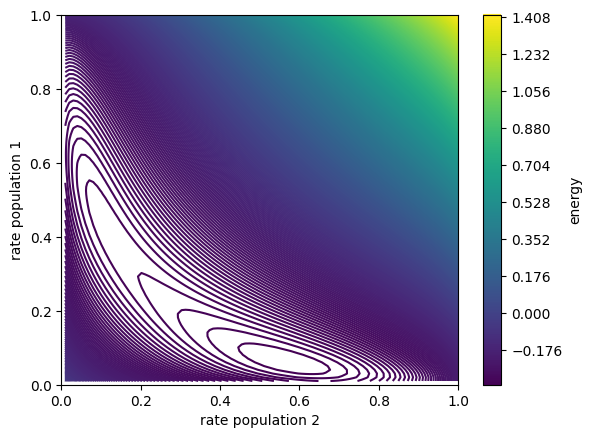

In [18]:
energy = np.zeros((100,100))
drive1 = 0.08
drive2 = 0.12

def integral(rate):
    lim = 2*rate - 1
    return 0.5*rate + 0.5* (lim*np.arctanh(lim) + 0.5*np.log(np.abs(1-lim*lim)) -0.7)

for i in range(100):
    r1 = i/100
    for j in range(100):
        r2 = j/100
        energy[i,j] = -0.5*(WEE - alpha)*(r1**2 + r2**2) + alpha*r1*r2 - (drive1*r1 + drive2*r2) + integral(r1) + integral(r2)

plt.contour(energy, extent=[0, 1, 0, 1], levels=500)
plt.colorbar(label='energy')
plt.xlabel('rate population 2')
plt.ylabel('rate population 1');

Text(0, 0.5, 'energy')

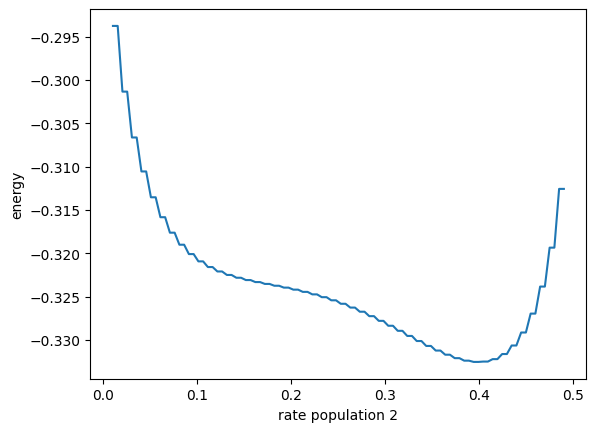

In [19]:
r1 = np.linspace(0,0.5,100)
r2 = -r1+0.5

i1 = r1*100
i1 = i1.astype(int)
i2 = r2*100
i2 = i2.astype(int)

plt.plot(r2, energy[i1, i2]);
plt.xlabel('rate population 2')
plt.ylabel('energy')

If you want to learn more about how this model has been applied to decision making, you are in luck: Jaime will explore it in depth in his session next week. Also, you can read [this paper](https://www.jneurosci.org/content/26/4/1314.short) by Wong and Wang.

# Ring attractor

We have now seen a model that can do interesting computations on a few numbers of discrete items, whether memories or decisions. What about storing a continuous quantity, like a length or an angle? For this purpose, the main model studied in computational neuroscience is the ring attractor model.

![ring model](ring.svg)

In this model, neurons are disposed on a ring and they are connected following a very precise connectivity scheme: neurons being close on the ring excite them more than neurons being more distant on the ring, which eventually inhibit each other effectively. Importantly, this pattern of connectivity is assumed to be translationally invariant, i.e. the strength of the connection between neuron N and neuron N + M  in the ring is exactly the same as the connection between neuron L and neuron L + M, for any N, M and L. Below I show you how to build such a connectivity scheme easily in Python. Looking at the graph below, convince yourself that this connectivity has the properties mentioned above.

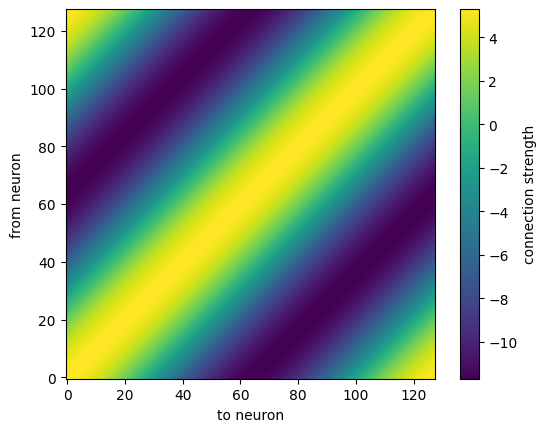

In [20]:
Nn = 128
x= np.linspace(-np.pi, np.pi, Nn, endpoint=False)

cs = np.cos(x)
sn = np.sin(x)

J0 = -3.2
J2 = 8.5
J = J0 + J2* (np.outer(cs,cs) + np.outer(sn, sn))

plt.imshow(J, origin="lower")
plt.xlabel('to neuron')
plt.ylabel('from neuron')
plt.colorbar(label="connection strength");

Now let's run the dynamics of a network with this connectivity. Instead of evolving two variables, one for each of two neural populations, as in the double-well model before, we now will evolve a whole vector of rates `rate` containging as many rate variables as neurons in the ring.

In [21]:
dt=0.01
time = np.arange(0,5,dt)
Nt = len(time)

rate = np.zeros((Nt,Nn)) # vector of rates through time

In [22]:
# input-output function for all cells, as used previously (Brunel, Cereb Cortex 13:1151, 2003)
def fI(x):
    return x*x*(x>0)*(x<1) + np.sqrt(np.abs(4*x-3))*(x>=1)

In [23]:
stim = 90 * np.pi/180.

I = 4*(1 - 0.1 + 0.1 * np.cos(x - stim)) # stimulus current

tau = 0.1

for i in range(Nt-1):
    if (i>100)&(i<150): 
        input=I #transient input at the beginning of the simulation
    else:
        input=0
    network_inputs = np.dot(J, rate[i])/Nn # this is the network step, where currents to each neuron are computed from the connectivity J and the rates
    rate[i+1] = rate[i] + dt/tau * (-rate[i] + fI(network_inputs + input))

Let's plot the result of the simulation (vertical dotted lines mark the period of stimulus presentation):

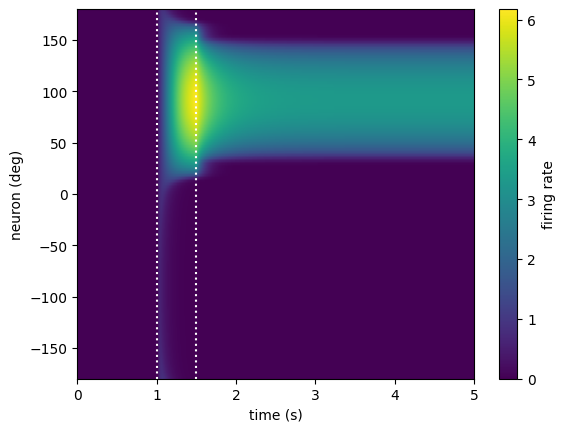

In [24]:
plt.imshow(rate.T, extent=[0,5,-180,180], aspect="auto", origin="lower")
plt.axvline(100*dt, color='w', ls=':')
plt.axvline(150*dt, color='w', ls=':')
plt.ylabel('neuron (deg)')
plt.xlabel('time (s)')
plt.colorbar(label='firing rate');

Play with the previous code changing: 
1) the strength of the connectivity $J_2$ (try reducing it to $J_2 = 7$)
2) the location where the stimulus is presented (`stim`)

What do you observe? Is this always a good system to store continuous memories?

If we now take a snapshot of the network activity at the end of the simulation, you can see why we also often call this network a *bump attractor network*.

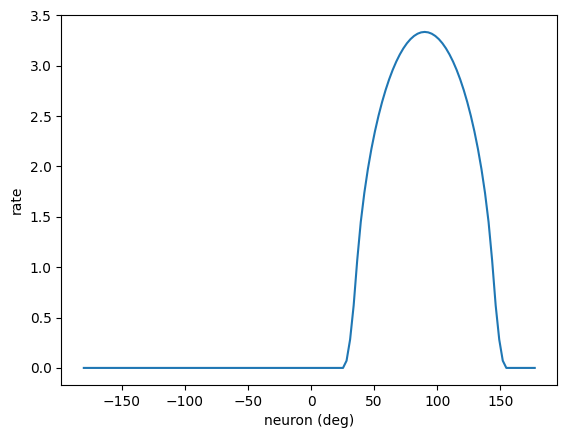

In [25]:
plt.plot(np.rad2deg(x), rate[-1]);
plt.xlabel('neuron (deg)')
plt.ylabel('rate');

Also in this network it is interesting to explore how it reacts when it is subject to noisy inputs, simulating the embedding of the circuit in a larger system with many uncontroled and unpredictable components.

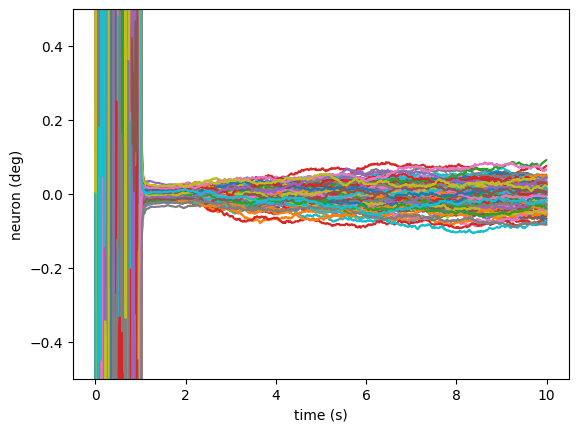

In [26]:
nsims=100
dt=0.01
time = np.arange(0,10,dt)
Nt = len(time)

# routine to extract population vectors from matrix of rates
vecs = np.cos(x) + 1j*np.sin(x)
vecs = np.outer(np.ones((1,Nt)),vecs)
def decode(rate):
    res = np.sum(vecs*rate, axis=1)
    return np.angle(res)

endpoints = np.zeros((nsims,))

# run the simulation multiple times
for n in range(nsims):

    # phase = 2*np.pi*np.random.rand()
    # I = 1*(1 - 0.1 - 0.1 * np.cos(x+phase))    
    I = 10*(1 - 0.1 + 0.1 * np.cos(x))

    rate = np.zeros((Nt,Nn))

    tau = 0.1

    for i in range(Nt-1):
        if (i>100)&(i<150):  
            input=I
        else:
            input=0
        network_inputs = np.dot(J, rate[i])/Nn
        noise = 0.3*np.random.randn(Nn,1).flatten()
        rate[i+1] = rate[i] + dt/tau * (-rate[i] + fI(network_inputs + input + noise))
    
    trace = decode(rate)

    plt.plot(time, trace)

    endpoints[n] = trace[-1]

plt.ylim([-0.5, 0.5])
plt.xlabel('time (s)')
plt.ylabel('neuron (deg)');


How do you interpret the results of this simulation? What happens with memories in this network as we make the retention interval or delay period longer and longer? This is a prediction of the model that was effectively validated in neural data of the monkey prefrontal cortex. You can check it out [here](http://neurophysics.ucsd.edu/courses/physics_171/Wimmer_Compte_reprint.pdf).